First updated @ Nov 2, 2021

Last updated @ Nov 9, 2021

In [1]:
# install packages that I don't have
# %pip install plotnine

## Import packages & data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotnine import *
from mizani.formatters import percent_format

In [13]:
bechdel_detailed_df = pd.read_csv('./Data/Bechdel_detailed.csv', index_col=0)
bechdel_detailed_df.rename(columns={'rating': 'bt_score'}, inplace=True) # I find the name rating a little confusing
bechdel_detailed_df

,title,year,bt_score,dubious,imdbid,id,submitterid,date,visible
0,Passage de Venus,1874.0,0.0,0.0,3155794.0,9602.0,18880.0,2021-04-02 20:58:09,1.0
1,La Rosace Magique,1877.0,0.0,0.0,14495706.0,9804.0,19145.0,2021-05-11 00:11:22,1.0
2,Sallie Gardner at a Gallop,1878.0,0.0,0.0,2221420.0,9603.0,18882.0,2021-04-03 02:25:27,1.0
3,Le singe musicien,1878.0,0.0,0.0,12592084.0,9806.0,19151.0,2021-05-11 23:38:54,1.0
4,Athlete Swinging a Pick,1881.0,0.0,0.0,7816420.0,9816.0,19162.0,2021-05-13 01:32:14,1.0
...,...,...,...,...,...,...,...,...,...
9368,Love Hard,2021.0,2.0,0.0,10752004.0,10152.0,19735.0,2021-12-05 19:22:20,1.0
9369,Cruella,2021.0,3.0,0.0,3228774.0,9861.0,19231.0,2021-06-01 03:16:58,1.0
9370,West Side Story,2021.0,3.0,0.0,3581652.0,10157.0,19743.0,2021-12-10 03:10:09,1.0
9371,Every Time a Bell Rings,2021.0,3.0,0.0,15943414.0,10158.0,19744.0,2021-12-10 08:03:02,1.0


In [14]:
bechdel_detailed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9373 entries, 0 to 9372
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9373 non-null   object 
 1   year         9373 non-null   float64
 2   bt_score     9373 non-null   float64
 3   dubious      9074 non-null   float64
 4   imdbid       9373 non-null   float64
 5   id           9373 non-null   float64
 6   submitterid  9373 non-null   float64
 7   date         9373 non-null   object 
 8   visible      9373 non-null   float64
dtypes: float64(7), object(2)
memory usage: 732.3+ KB


We can see that there are some null numbers in the dubious column. Let's drop them. 

In [15]:
bechdel_detailed_df = bechdel_detailed_df.dropna().reset_index(drop=True)
len(bechdel_detailed_df)

9074

Check duplicates

In [16]:
bechdel_detailed_df.duplicated().sum()

9

In [17]:
bechdel_detailed_df[bechdel_detailed_df.duplicated()]

,title,year,bt_score,dubious,imdbid,id,submitterid,date,visible
839,Saboteur,1956.0,1.0,0.0,35279.0,5938.0,11248.0,2014-11-22 17:38:29,1.0
1924,Terms of Endearment,1983.0,1.0,1.0,86425.0,4448.0,7970.0,2013-08-07 09:53:44,1.0
3149,Ayneh,1997.0,3.0,0.0,117056.0,4380.0,7796.0,2013-07-21 16:53:37,1.0
6183,Last Call at the Oasis,2011.0,3.0,0.0,2043900.0,4889.0,8867.0,2013-11-29 21:16:54,1.0
6826,Puella Magi Madoka Magica the Movie Part III: ...,2013.0,3.0,0.0,2457282.0,4980.0,9023.0,2013-12-24 20:34:24,1.0
8075,Moana,2016.0,3.0,0.0,3521164.0,7292.0,14251.0,2016-11-24 02:28:18,1.0
8834,Descendants 3,2019.0,3.0,0.0,8022928.0,8816.0,17295.0,2019-08-12 18:52:11,1.0
9063,"Suicide Squad, The",2021.0,3.0,0.0,6334354.0,10004.0,19435.0,2021-08-08 22:16:55,1.0
9070,Cruella,2021.0,3.0,0.0,3228774.0,9861.0,19231.0,2021-06-01 03:16:58,1.0


In [18]:
bechdel_detailed_df.drop_duplicates(inplace=True)
bechdel_detailed_df = bechdel_detailed_df.reset_index(drop=True)
bechdel_detailed_df

,title,year,bt_score,dubious,imdbid,id,submitterid,date,visible
0,Passage de Venus,1874.0,0.0,0.0,3155794.0,9602.0,18880.0,2021-04-02 20:58:09,1.0
1,La Rosace Magique,1877.0,0.0,0.0,14495706.0,9804.0,19145.0,2021-05-11 00:11:22,1.0
2,Sallie Gardner at a Gallop,1878.0,0.0,0.0,2221420.0,9603.0,18882.0,2021-04-03 02:25:27,1.0
3,Le singe musicien,1878.0,0.0,0.0,12592084.0,9806.0,19151.0,2021-05-11 23:38:54,1.0
4,Athlete Swinging a Pick,1881.0,0.0,0.0,7816420.0,9816.0,19162.0,2021-05-13 01:32:14,1.0
...,...,...,...,...,...,...,...,...,...
9060,Encanto,2021.0,3.0,0.0,2953050.0,10151.0,19732.0,2021-12-02 00:36:48,1.0
9061,Love Hard,2021.0,2.0,0.0,10752004.0,10152.0,19735.0,2021-12-05 19:22:20,1.0
9062,West Side Story,2021.0,3.0,0.0,3581652.0,10157.0,19743.0,2021-12-10 03:10:09,1.0
9063,Every Time a Bell Rings,2021.0,3.0,0.0,15943414.0,10158.0,19744.0,2021-12-10 08:03:02,1.0


In [19]:
bechdel_detailed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,9065.0,1.995879e+03,2.537578e+01,1874.0,1988.0,2006.0,2013.0,2021.0
bt_score,9065.0,2.122890e+00,1.107480e+00,0.0,1.0,3.0,3.0,3.0
dubious,9065.0,8.924435e-02,2.851118e-01,0.0,0.0,0.0,0.0,1.0
imdbid,9065.0,1.517000e+06,2.235857e+06,1.0,98532.0,435679.0,1937390.0,15943414.0
id,9065.0,5.142544e+03,2.822653e+03,1.0,2676.0,5144.0,7531.0,10161.0
submitterid,9065.0,9.498116e+03,5.979253e+03,1.0,4026.0,9387.0,14702.0,19753.0
visible,9065.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,1.0


The bt_score is obviously negatively screwed, causing a ceiling effect. 

## Analysis & Visualization

I am borrowing some R code to make certain graphs look prettier. Here, I will use a mixture of matplotlib/seaborn and ggplot2, which is [PlotNine](https://towardsdatascience.com/how-to-use-ggplot2-in-python-74ab8adec129) in Python. 

### Distribution of all bt_score

We can see that over half of movies in this dataset pass the Bechdel Test, which is great!

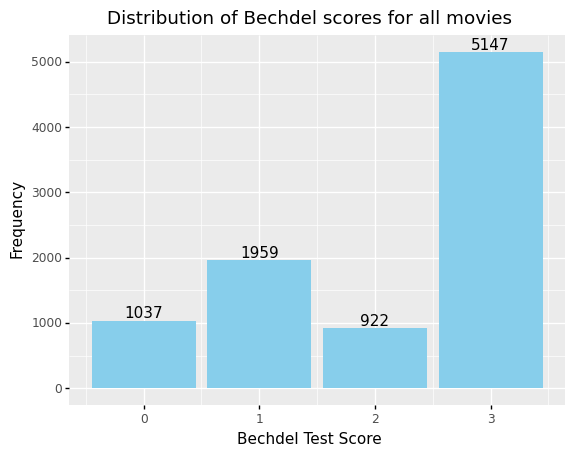

<ggplot: (-9223363275420921358)>

In [20]:
(ggplot(bechdel_detailed_df, aes(x = 'bt_score')) + 
    geom_bar(fill = 'skyblue') + 
    geom_text(
        aes(label = after_stat('count')),
        stat = 'count',
        nudge_y = 0.125,
        va = 'bottom'
    ) +
    labs(
        title = 'Distribution of Bechdel scores for all movies',
        x = 'Bechdel Test Score',
        y = 'Frequency'
    )
)

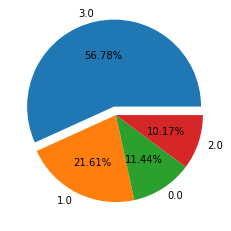

In [21]:
score_count_series = bechdel_detailed_df['bt_score'].value_counts()
gap = [0.1, 0, 0, 0]
plt.pie(np.array(score_count_series), labels = score_count_series.index, explode = gap, autopct='%.2f%%')
plt.show() 

### dubious proportion

In [22]:
dubious_count = bechdel_detailed_df['dubious'].value_counts()
print('Percentage of dubious movie scores:', str('{:.2f}'.format(dubious_count[1.0] / (dubious_count[1.0] + dubious_count[0.0]) * 100))+'%')

Percentage of dubious movie scores: 8.92%


Let's investigate this a little further and see what the dubious movies are really like.

In [23]:
dubious_movies = bechdel_detailed_df[bechdel_detailed_df['dubious'] == 1]
dubious_movies

,title,year,bt_score,dubious,imdbid,id,submitterid,date,visible
66,Akrobatisches Potpourri,1895.0,1.0,1.0,11.0,9679.0,18987.0,2021-04-24 19:08:28,1.0
69,Baby&#39;s Dinner,1895.0,1.0,1.0,29.0,9715.0,19029.0,2021-04-29 01:35:15,1.0
126,"Princess Nicotine; or, The Smoke Fairy",1909.0,2.0,1.0,1009.0,4409.0,7862.0,2013-07-28 12:00:46,1.0
137,A Florida Enchantment,1914.0,2.0,1.0,3973.0,4457.0,7991.0,2013-08-10 05:01:03,1.0
148,"Raffles, the Amateur Cracksman",1917.0,2.0,1.0,8489.0,2019.0,2700.0,2011-02-11 21:49:04,1.0
...,...,...,...,...,...,...,...,...,...
9009,Luca,2021.0,1.0,1.0,12801262.0,9964.0,19374.0,2021-07-13 18:04:13,1.0
9017,Jungle Cruise,2021.0,3.0,1.0,870154.0,9996.0,19422.0,2021-08-04 08:47:20,1.0
9040,No Time To Die,2021.0,2.0,1.0,2382320.0,10075.0,19585.0,2021-10-04 08:29:46,1.0
9044,"Last Duel, The",2021.0,3.0,1.0,4244994.0,10085.0,19619.0,2021-10-20 02:30:29,1.0


In [24]:
print('Proportion of movies scored 0:', str('{:.2f}'.format(sum(dubious_movies['bt_score'] == 0.0) / len(dubious_movies) * 100))+'%')
print('Proportion of movies scored 1:', str('{:.2f}'.format(sum(dubious_movies['bt_score'] == 1.0) / len(dubious_movies) * 100))+'%')
print('Proportion of movies scored 2:', str('{:.2f}'.format(sum(dubious_movies['bt_score'] == 2.0) / len(dubious_movies) * 100))+'%')
print('Proportion of movies scored 3:', str('{:.2f}'.format(sum(dubious_movies['bt_score'] == 3.0) / len(dubious_movies) * 100))+'%')

Proportion of movies scored 0: 2.84%
Proportion of movies scored 1: 9.64%
Proportion of movies scored 2: 13.47%
Proportion of movies scored 3: 74.04%


This is tricky because nothing is certain... and humans hate uncertainty. But I do not really want to just discard this information. I think it is better to classify movies in to 3 categories: passing, failing the Bechdel test and dubious. 

In [25]:
for index, bt_score in bechdel_detailed_df['bt_score'].iteritems():
    if bt_score == 0:
        if bechdel_detailed_df.at[index, 'dubious'] == 1:
            bechdel_detailed_df.at[index, 'category'] = 'Dubious'
        else:
            bechdel_detailed_df.at[index, 'category'] = '0-Fewer than two female characters'
    elif bt_score == 1:
        if bechdel_detailed_df.at[index, 'dubious'] == 1:
            bechdel_detailed_df.at[index, 'category'] = 'Dubious'
        else:
            bechdel_detailed_df.at[index, 'category'] = '1-Female characters do not talk'
    elif bt_score == 2:
        if bechdel_detailed_df.at[index, 'dubious'] == 1:
            bechdel_detailed_df.at[index, 'category'] = 'Dubious'
        else:
            bechdel_detailed_df.at[index, 'category'] = '2-Female characters talk about men'
    else:
        if bechdel_detailed_df.at[index, 'dubious'] == 1:
            bechdel_detailed_df.at[index, 'category'] = 'Dubious'
        else:
            bechdel_detailed_df.at[index, 'category'] = '3-Passes Bechdel Test'

In [26]:
bechdel_detailed_df.tail()

,title,year,bt_score,dubious,imdbid,id,submitterid,date,visible,category
9060,Encanto,2021.0,3.0,0.0,2953050.0,10151.0,19732.0,2021-12-02 00:36:48,1.0,3-Passes Bechdel Test
9061,Love Hard,2021.0,2.0,0.0,10752004.0,10152.0,19735.0,2021-12-05 19:22:20,1.0,2-Female characters talk about men
9062,West Side Story,2021.0,3.0,0.0,3581652.0,10157.0,19743.0,2021-12-10 03:10:09,1.0,3-Passes Bechdel Test
9063,Every Time a Bell Rings,2021.0,3.0,0.0,15943414.0,10158.0,19744.0,2021-12-10 08:03:02,1.0,3-Passes Bechdel Test
9064,Single All The Way,2021.0,3.0,0.0,14315756.0,10161.0,19753.0,2021-12-15 10:10:36,1.0,3-Passes Bechdel Test


### Changes over the years

- Is the average of Bechdel score rising?
- Is the proportion of movies passing the Bechdel test rising? 

**Important Note**: There is no point in checking the NUMBER of movie passing the Bechdel Test over the years because of population affect, aka size affect. A simple example is that we talk about death rate changes over time, not number of deaths of the world, because there is more people on this planet than 100 years ago. The NUMBER is inflated by the growing population, causing the population affect. By checking the ratio, or proportion, we mitigate the population affect.

Same logic here, if there are more movies being released this year than 10 years ago, there would be more movies passing the bechdel test even if the ratio of passing stays the same. There is no point in checking the NUMBER. 

In [27]:
bechdel_year_mean = bechdel_detailed_df.groupby(['year'])['bt_score'].mean().to_frame().reset_index()
# bechdel_year_mean.rename(columns={'bt_score': 'mean_bt_score'}, inplace=True)
bechdel_year_mean

,year,bt_score
0,1874.0,0.000000
1,1877.0,0.000000
2,1878.0,0.000000
3,1881.0,0.000000
4,1883.0,0.000000
...,...,...
135,2017.0,2.346715
136,2018.0,2.346774
137,2019.0,2.367769
138,2020.0,2.503817


/Users/zhuang/opt/anaconda3/envs/ds/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


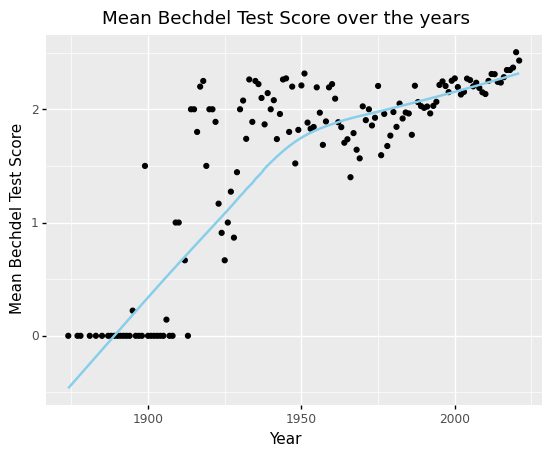

<ggplot: (-9223363275421587463)>

In [28]:
# geom_smooth() is an estimate of the conditional mean function. 
# It draws a curve and gives you a general trend of the data
(ggplot(bechdel_year_mean, aes(x = 'year', y = 'bt_score')) + 
    geom_point() + 
    geom_smooth(color='skyblue') + 
    labs(
        title = 'Mean Bechdel Test Score over the years',
        x = 'Year', 
        y = 'Mean Bechdel Test Score'
    )
)

Good news that the average Bechdel score is increasing over the years! The smooth line helps us understand the general trend of the data, but I don't really like it going below 0 in the earlier years. But it has something to do with the mechanism of geom_smooth(), so I am going to let it slide. 

Is it because the proportion of movies passing the test is increasing? Let's find out.

In [15]:
# # first get total count of movies released in each year
# bechdel_year_proportion = bechdel_df.groupby(['year'])['bt_score'].count().to_frame().reset_index()
# bechdel_year_proportion.rename(columns={'bt_score': 'total_count'}, inplace=True)
# bechdel_year_proportion

In [29]:
bechdel_df_ordered = bechdel_detailed_df.copy()
bechdel_df_ordered['category'] = pd.Categorical(bechdel_df_ordered['category'], categories=[
    '0-Fewer than two female characters', 
    '1-Female characters do not talk',
    '2-Female characters talk about men', 
    'Dubious',
    '3-Passes Bechdel Test'
], ordered=True)

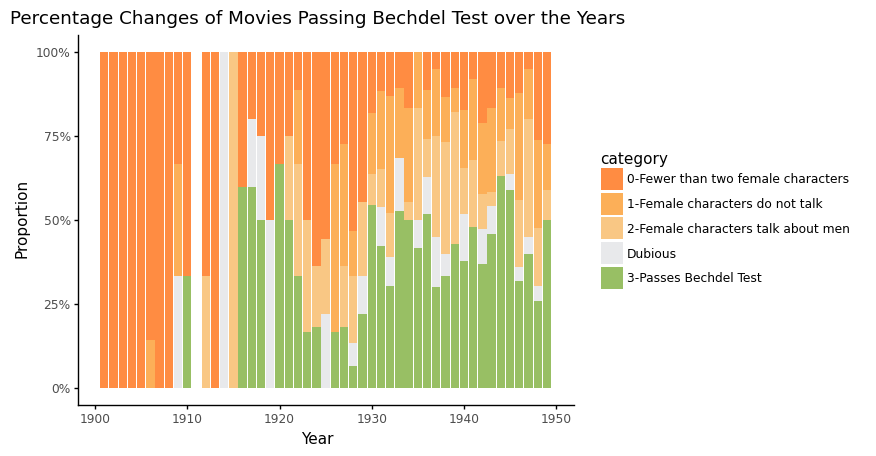

<ggplot: (8761432452763)>

In [30]:
# fitting all the years in the graph looks terrible
# Here I selected the data between 1950-2000 to make it a little better, but it is still not good
(ggplot(bechdel_df_ordered[(bechdel_df_ordered['year'] > 1900) & (bechdel_df_ordered['year'] < 1950)], 
        aes(fill = 'category', x = 'year')) + 
    geom_bar(position = "fill") + 
    scale_y_continuous(labels=percent_format()) +
    scale_fill_manual(values = ['#FF8C42', '#FCAF58', '#F9C784', '#E8E9EB', '#98BF64']) +
    labs(
        title = 'Percentage Changes of Movies Passing Bechdel Test over the Years', 
        subtitle = 'Stacked Percentage Bar Chart',
        x = 'Year', 
        y = 'Proportion'
    ) + 
    theme_classic()
)

Segmenting yearly seems a little difficult to read. I am going to try segmenting by 10 years.

In [31]:
# Adding a new column that segment the years in to 10-year intervals
for index, year in bechdel_df_ordered['year'].iteritems():
    interval_start = int(year - year % 10 + 1)
    interval_end = int(interval_start + 9)
    bechdel_df_ordered.at[index, 'year_interval'] = str(interval_start) + '-' + str(interval_end)
bechdel_df_ordered

,title,year,bt_score,dubious,imdbid,id,submitterid,date,visible,category,year_interval
0,Passage de Venus,1874.0,0.0,0.0,3155794.0,9602.0,18880.0,2021-04-02 20:58:09,1.0,0-Fewer than two female characters,1871-1880
1,La Rosace Magique,1877.0,0.0,0.0,14495706.0,9804.0,19145.0,2021-05-11 00:11:22,1.0,0-Fewer than two female characters,1871-1880
2,Sallie Gardner at a Gallop,1878.0,0.0,0.0,2221420.0,9603.0,18882.0,2021-04-03 02:25:27,1.0,0-Fewer than two female characters,1871-1880
3,Le singe musicien,1878.0,0.0,0.0,12592084.0,9806.0,19151.0,2021-05-11 23:38:54,1.0,0-Fewer than two female characters,1871-1880
4,Athlete Swinging a Pick,1881.0,0.0,0.0,7816420.0,9816.0,19162.0,2021-05-13 01:32:14,1.0,0-Fewer than two female characters,1881-1890
...,...,...,...,...,...,...,...,...,...,...,...
9060,Encanto,2021.0,3.0,0.0,2953050.0,10151.0,19732.0,2021-12-02 00:36:48,1.0,3-Passes Bechdel Test,2021-2030
9061,Love Hard,2021.0,2.0,0.0,10752004.0,10152.0,19735.0,2021-12-05 19:22:20,1.0,2-Female characters talk about men,2021-2030
9062,West Side Story,2021.0,3.0,0.0,3581652.0,10157.0,19743.0,2021-12-10 03:10:09,1.0,3-Passes Bechdel Test,2021-2030
9063,Every Time a Bell Rings,2021.0,3.0,0.0,15943414.0,10158.0,19744.0,2021-12-10 08:03:02,1.0,3-Passes Bechdel Test,2021-2030


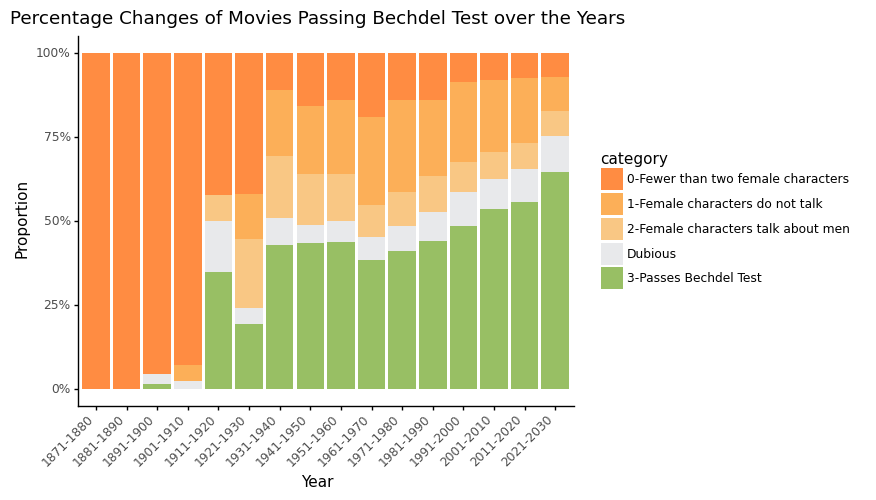

<ggplot: (-9223363275421851262)>

In [32]:
(ggplot(bechdel_df_ordered, 
        aes(fill = 'category', x = 'year_interval')) + 
    geom_bar(position = "fill") + 
    scale_y_continuous(labels=percent_format()) +
    scale_fill_manual(values = ['#FF8C42', '#FCAF58', '#F9C784', '#E8E9EB', '#98BF64']) +
    labs(
        title = 'Percentage Changes of Movies Passing Bechdel Test over the Years', 
        subtitle = 'Stacked Percentage Bar Chart',
        x = 'Year', 
        y = 'Proportion'
    ) + 
    theme_classic() + 
    theme(axis_text_x  = element_text(angle = 45, hjust = 1))
)

I think this one is better. And the general trend is easier to see. 

## GIF Vis

I don't like the fact that I cannot visualize all years in the bar chart, so I made an animated pie chart to better understand the changes over the years. 

https://stackoverflow.com/questions/64734034/animating-pie-chart-using-funcanimation-showing-last-frame-only

In [33]:
from matplotlib.animation import FuncAnimation

In [34]:
bechdel_pie = bechdel_detailed_df.groupby(['year'])['bt_score'].count().to_frame().reset_index()
bechdel_pie.rename(columns={'bt_score': 'total'}, inplace=True)
# add counts of 0's
bechdel_pie_0 = bechdel_detailed_df[bechdel_detailed_df['category'] == '0-Fewer than two female characters'].groupby('year')['bt_score'].count()
for index_year, value_count in bechdel_pie_0.items():
    bechdel_pie.loc[bechdel_pie['year'] == index_year, ['0']] = value_count
# add counts of 1's
bechdel_pie_1 = bechdel_detailed_df[bechdel_detailed_df['category'] == '1-Female characters do not talk'].groupby('year')['bt_score'].count()
for index_year, value_count in bechdel_pie_1.items():
    bechdel_pie.loc[bechdel_pie['year'] == index_year, ['1']] = value_count
# add counts of 2's
bechdel_pie_2 = bechdel_detailed_df[bechdel_detailed_df['category'] == '2-Female characters talk about men'].groupby('year')['bt_score'].count()
for index_year, value_count in bechdel_pie_2.items():
    bechdel_pie.loc[bechdel_pie['year'] == index_year, ['2']] = value_count
# add counts of Dubious's
bechdel_pie_d = bechdel_detailed_df[bechdel_detailed_df['category'] == 'Dubious'].groupby('year')['bt_score'].count()
for index_year, value_count in bechdel_pie_d.items():
    bechdel_pie.loc[bechdel_pie['year'] == index_year, ['Dubious']] = value_count
# add counts of 3's
bechdel_pie_3 = bechdel_detailed_df[bechdel_detailed_df['category'] == '3-Passes Bechdel Test'].groupby('year')['bt_score'].count()
for index_year, value_count in bechdel_pie_3.items():
    bechdel_pie.loc[bechdel_pie['year'] == index_year, ['3']] = value_count
# fill all the empty values with 0's
bechdel_pie = bechdel_pie.fillna(0)

# check if counts match up
for index, total in bechdel_pie['total'].iteritems():
    assert bechdel_pie.at[index, '0'] + bechdel_pie.at[index, '1'] + bechdel_pie.at[index, '2'] + bechdel_pie.at[index, 'Dubious'] + bechdel_pie.at[index, '3'] == bechdel_pie.at[index, 'total']
bechdel_pie

,year,total,0,1,2,Dubious,3
0,1874.0,1,1.0,0.0,0.0,0.0,0.0
1,1877.0,1,1.0,0.0,0.0,0.0,0.0
2,1878.0,2,2.0,0.0,0.0,0.0,0.0
3,1881.0,1,1.0,0.0,0.0,0.0,0.0
4,1883.0,1,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
135,2017.0,274,19.0,49.0,20.0,34.0,152.0
136,2018.0,248,18.0,41.0,20.0,24.0,145.0
137,2019.0,242,15.0,41.0,14.0,17.0,155.0
138,2020.0,131,8.0,15.0,7.0,14.0,87.0


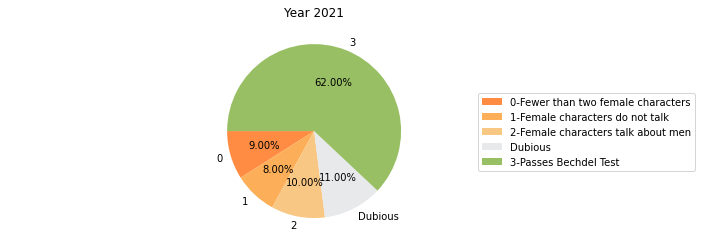

In [35]:
counts_title = np.array(bechdel_pie[['0', '1', '2', 'Dubious', '3', 'year']])

colors = ['#FF8C42', '#FCAF58', '#F9C784', '#E8E9EB', '#98BF64']
labels = ["0", "1", "2", "Dubious", "3"]
gap = [0, 0, 0, 0, 0]

fig, ax = plt.subplots(figsize=(11,4))
fig.subplots_adjust(wspace=None, hspace=None)

def update(num):
    z = np.array(counts_title[num][:-1]).astype(float)
    ax.clear()
    ax.axis('equal')
    ax.pie(z, explode=gap, labels=labels, colors=colors, autopct='%1.2f%%', shadow=False, startangle=180)
    ax.legend(['0-Fewer than two female characters',
                '1-Female characters do not talk',
                '2-Female characters talk about men',
                'Dubious', 
                '3-Passes Bechdel Test'], 
                bbox_to_anchor=(1,0.5), 
                loc="center right", 
                fontsize=10, 
                bbox_transform=plt.gcf().transFigure
                )
    ax.set_title('Year ' + str(int(counts_title[num][-1])))
    ax.margins(1, 0)

ani = FuncAnimation(fig, update, frames=range(len(counts_title)), repeat=False)
ani.save('bechdel.gif', writer='pillow', fps=2)

This output above is not really showing correctly. I cropped it using https://www.online-image-editor.com/. Here is what you should be able to see if you download the GIF:

![pieChart](./bechdel_cropped.gif "pieChart")

## Mean Percentage Change

In [36]:
bechdel_df_ordered.head()

,title,year,bt_score,dubious,imdbid,id,submitterid,date,visible,category,year_interval
0,Passage de Venus,1874.0,0.0,0.0,3155794.0,9602.0,18880.0,2021-04-02 20:58:09,1.0,0-Fewer than two female characters,1871-1880
1,La Rosace Magique,1877.0,0.0,0.0,14495706.0,9804.0,19145.0,2021-05-11 00:11:22,1.0,0-Fewer than two female characters,1871-1880
2,Sallie Gardner at a Gallop,1878.0,0.0,0.0,2221420.0,9603.0,18882.0,2021-04-03 02:25:27,1.0,0-Fewer than two female characters,1871-1880
3,Le singe musicien,1878.0,0.0,0.0,12592084.0,9806.0,19151.0,2021-05-11 23:38:54,1.0,0-Fewer than two female characters,1871-1880
4,Athlete Swinging a Pick,1881.0,0.0,0.0,7816420.0,9816.0,19162.0,2021-05-13 01:32:14,1.0,0-Fewer than two female characters,1881-1890


In [37]:
bechdel_1985 = bechdel_df_ordered[bechdel_df_ordered['year'] >= 1985].reset_index(drop= True)
bechdel_1985

,title,year,bt_score,dubious,imdbid,id,submitterid,date,visible,category,year_interval
0,Just One of the Guys,1985.0,3.0,0.0,89393.0,402.0,63.0,2009-07-31 04:18:43,1.0,3-Passes Bechdel Test,1981-1990
1,Red Sonja,1985.0,3.0,0.0,89893.0,418.0,85.0,2009-08-06 21:29:43,1.0,3-Passes Bechdel Test,1981-1990
2,Otac na sluzbenom putu,1985.0,3.0,1.0,89748.0,486.0,168.0,2009-08-28 22:48:20,1.0,Dubious,1981-1990
3,Weird Science,1985.0,3.0,0.0,90305.0,520.0,217.0,2009-10-05 04:41:43,1.0,3-Passes Bechdel Test,1981-1990
4,Police Academy 2: Their First Assignment,1985.0,1.0,0.0,89822.0,576.0,305.0,2009-12-21 21:44:14,1.0,1-Female characters do not talk,1981-1990
...,...,...,...,...,...,...,...,...,...,...,...
7037,Encanto,2021.0,3.0,0.0,2953050.0,10151.0,19732.0,2021-12-02 00:36:48,1.0,3-Passes Bechdel Test,2021-2030
7038,Love Hard,2021.0,2.0,0.0,10752004.0,10152.0,19735.0,2021-12-05 19:22:20,1.0,2-Female characters talk about men,2021-2030
7039,West Side Story,2021.0,3.0,0.0,3581652.0,10157.0,19743.0,2021-12-10 03:10:09,1.0,3-Passes Bechdel Test,2021-2030
7040,Every Time a Bell Rings,2021.0,3.0,0.0,15943414.0,10158.0,19744.0,2021-12-10 08:03:02,1.0,3-Passes Bechdel Test,2021-2030


In [38]:
count_1985_total = bechdel_1985.groupby('year')['bt_score'].count()
count_1985_total, len(count_1985_total)

(year
 1985.0     81
 1986.0     71
 1987.0     77
 1988.0     79
 1989.0     71
 1990.0     80
 1991.0     83
 1992.0     82
 1993.0    100
 1994.0    106
 1995.0    107
 1996.0    122
 1997.0    107
 1998.0    132
 1999.0    127
 2000.0    143
 2001.0    158
 2002.0    169
 2003.0    163
 2004.0    192
 2005.0    198
 2006.0    252
 2007.0    252
 2008.0    223
 2009.0    327
 2010.0    356
 2011.0    371
 2012.0    353
 2013.0    413
 2014.0    392
 2015.0    335
 2016.0    325
 2017.0    274
 2018.0    248
 2019.0    242
 2020.0    131
 2021.0    100
 Name: bt_score, dtype: int64,
 37)

In [39]:
bechdel_1985_pass = bechdel_1985[bechdel_1985['bt_score'] == 3].reset_index(drop=True)
# bechdel_1985_pass
count_1985_pass = bechdel_1985_pass.groupby('year')['bt_score'].count()
count_1985_pass, len(count_1985_pass)

(year
 1985.0     40
 1986.0     30
 1987.0     47
 1988.0     43
 1989.0     37
 1990.0     42
 1991.0     43
 1992.0     39
 1993.0     54
 1994.0     58
 1995.0     62
 1996.0     76
 1997.0     60
 1998.0     73
 1999.0     77
 2000.0     89
 2001.0     98
 2002.0     95
 2003.0     97
 2004.0    118
 2005.0    121
 2006.0    153
 2007.0    154
 2008.0    133
 2009.0    185
 2010.0    210
 2011.0    232
 2012.0    226
 2013.0    270
 2014.0    232
 2015.0    206
 2016.0    203
 2017.0    183
 2018.0    164
 2019.0    164
 2020.0     99
 2021.0     70
 Name: bt_score, dtype: int64,
 37)

In [40]:
ratio_pass_1985 = np.asarray(count_1985_pass) / np.asarray(count_1985_total)
ratio_pass_1985

array([0.49382716, 0.42253521, 0.61038961, 0.5443038 , 0.52112676,
       0.525     , 0.51807229, 0.47560976, 0.54      , 0.54716981,
       0.57943925, 0.62295082, 0.56074766, 0.5530303 , 0.60629921,
       0.62237762, 0.62025316, 0.56213018, 0.59509202, 0.61458333,
       0.61111111, 0.60714286, 0.61111111, 0.59641256, 0.56574924,
       0.58988764, 0.62533693, 0.64022663, 0.65375303, 0.59183673,
       0.61492537, 0.62461538, 0.66788321, 0.66129032, 0.67768595,
       0.75572519, 0.7       ])

In [41]:
ratio_changes = []
for index, ratio in enumerate(ratio_pass_1985):
    if index >= 1:
        ratio_changes.append(ratio - ratio_pass_1985[index - 1])
ratio_changes

[-0.07129194922622151,
 0.18785439912200474,
 -0.06608581292125593,
 -0.02317703690497419,
 0.0038732394366197687,
 -0.0069277108433735135,
 -0.042462533059065555,
 0.06439024390243908,
 0.007169811320754671,
 0.032269441015693845,
 0.04351156733568262,
 -0.06220315612072935,
 -0.007717360521098837,
 0.05326890956812225,
 0.016078409779197167,
 -0.002124457820660397,
 -0.058122987042169116,
 0.03296184702508442,
 0.019491308793456064,
 -0.00347222222222221,
 -0.003968253968254065,
 0.003968253968254065,
 -0.014698555057299556,
 -0.030663320579805475,
 0.02413840497543207,
 0.0354492867742815,
 0.014889701671464417,
 0.013526397739198504,
 -0.061916291940505075,
 0.023088638440450837,
 0.009690011481056193,
 0.04326782706344756,
 -0.006592889098187005,
 0.016395627832577975,
 0.07803924042647159,
 -0.05572519083969474]

In [42]:
np.mean(ratio_changes)

0.005727023319615911